In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load datasets
student_mat = pd.read_table('/home/ics-home/Pearson Proj/Pearson/datasets/student-mat.csv', sep=";")
student_por = pd.read_table('/home/ics-home/Pearson Proj/Pearson/datasets/student-por.csv', sep=";")

In [ ]:
# Print student-mat db
print(student_mat)

In [ ]:
# Print student-por db
print(student_por)

In [ ]:
# Creating a histogram for single variable
student_mat['G1'].plot(kind='hist', bins=20, figsize=(10, 6), color='blue', alpha=0.7)
plt.title('Histogram of G1')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

In [ ]:
student_mat.describe()

In [ ]:
student_por.describe()

**Histograms for all numeric columns in student-mat.**

In [ ]:
# Can make individual ones or one for each numeric column
# x-axis is the value and y-axis is the count
student_mat.hist(bins=20, figsize=(15, 10), color='green', alpha=0.5)
plt.suptitle('Histograms for All Numeric Columns in Student-Mat')
plt.show()

**Boxplots for all numeric columns in student-mat.**

In [ ]:
# Box Plots for all numeric columns
student_mat.boxplot(figsize=(12, 8), vert=False)
plt.title('Horizontal Box Plots for All Numeric Columns in Student-Mat')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

In [ ]:
# There was a student with 75 absences???
student_mat["absences"].max()

**Histograms for all numeric columns in student-mat.**

In [ ]:
# Can make individual ones or one for each numeric column
# x-axis is the value and y-axis is the count
student_por.hist(bins=20, figsize=(15, 10), color='green', alpha=0.5)
plt.suptitle('Histograms for All Numeric Columns in Student-Por')
plt.show()

**Boxplots for all numeric columns in student-mat.**

In [ ]:
# Box Plots for all numeric columns
student_por.boxplot(figsize=(12, 8), vert=False)
plt.title('Horizontal Box Plots for All Numeric Columns in Student-Por')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

***The values in the numeric columns of student-por fall in a smaller range than student-mat***

2. Using bar charts to compare average grades accross diff categories

In [ ]:
# Gender
gender_avg = student_mat.groupby('sex')['G1'].mean()
gender_avg.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 6))
plt.title('Average Grades by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Parent Edu
medu_avg = student_mat.groupby('Medu')['G1'].mean()
medu_avg.plot(kind='bar', figsize=(8, 6))
plt.title('Average Grades by Mothers Education')
plt.xlabel('Mothers Education')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()

In [ ]:
walc_avg = student_mat.groupby('Walc')['G1'].mean()
walc_avg.plot(kind='bar', figsize=(8, 6))
plt.title('Average Grades by Weekend Alc Comsumption')
plt.xlabel('Weekly Alc Consumption')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=student_mat, x='Walc', y='G1', palette='Blues')
plt.title('Grades by Walc')
plt.xlabel('Walc')
plt.ylabel('Grades')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=student_mat, x='Dalc', y='G1', palette='Blues')
plt.title('Grades by Dalc')
plt.xlabel('Dalc')
plt.ylabel('Grades')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=student_mat, x='romantic', y='G1', palette='Purples')
plt.title('Grades by Romantic')
plt.xlabel('Romantic Relationship (Yes/No)')
plt.ylabel('Grades')
plt.show()

Upper quartile for student's without romantic relationships is higher than those with romantic relationships.

In [ ]:
# Filtered Student Portuguese
filtered_student_por_high_grades = student_por[student_por["G1"] > 14]
filtered_student_por_high_grades.hist(bins=20, figsize=(15, 10), color='green', alpha=0.5)

plt.suptitle('Histograms for Numeric Columns (G1 > 14)')
plt.show()

In [ ]:
# Filtered Student Portuguese
filtered_student_por_low_grades = student_por[student_por["G1"] <= 14]
filtered_student_por_low_grades.hist(bins=20, figsize=(15, 10), color='green', alpha=0.5)

plt.suptitle('Histograms for Numeric Columns (G1 <= 14)')
plt.show()

In [ ]:
# Filtered Student Math
filtered_student_mat_high_grades = student_mat[student_mat["G1"] > 14]
filtered_student_mat_high_grades.hist(bins=20, figsize=(15, 10), color='green', alpha=0.5)

plt.suptitle('Histograms for Numeric Columns (G1 > 14)')
plt.show()

In [ ]:
# Filtered Student Math
filtered_student_por_low_grades = student_mat[student_mat["G1"] <= 14]
filtered_student_por_low_grades.hist(bins=20, figsize=(15, 10), color='green', alpha=0.5)

plt.suptitle('Histograms for Numeric Columns (G1 <= 14)')
plt.show()

In [ ]:
# Count occurrences of each grade per gender
grade_counts = student_mat.groupby('Walc')['G1'].value_counts().unstack()

# Plot bar chart
grade_counts.T.plot(kind='bar', figsize=(12, 6))

plt.title('Distribution of G1 Grades by Walc')
plt.xlabel('G1 Grade')
plt.ylabel('Number of Students')
plt.legend(title='Walc')
plt.xticks(rotation=0)
plt.show()

In [227]:
def perform_chi_square_test(data, col1, col2):
    # creating contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # performing the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # interpreting the result
    significant = p < 0.05 #5% significance level
    return chi2, p, significant

aspects_to_test = {
    'School Support and Academic Performance': ('schoolsup', 'G1'),
    'Extra Classes and Academic Performance': ('paid', 'G1')
}

por_chi_square_results = {aspect: perform_chi_square_test(student_por, *columns) for aspect, columns in aspects_to_test.items()}
por_chi_square_results

{'School Support and Academic Performance': (26.941190988010995,
  0.04214144676225212,
  True),
 'Extra Classes and Academic Performance': (11.092991992777318,
  0.8037093179377917,
  False)}

something


**Boxplots of grades (G1, G2, G3) across the categorical variables.**

In [ ]:
# list of categorical variables
categorical_vars = [
    "sex", "school", "address", "Pstatus", "Mjob", "Fjob", "guardian", 
    "famsize", "reason", "schoolsup", "famsup", "activities", "paid", 
    "internet", "nursery", "higher", "romantic"
]

# Grades to analyze
grades = ["G1", "G2", "G3"]

# Plot boxplots
for cat in categorical_vars:
    for grade in grades:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat, y=grade, data=student_mat)
        plt.title(f"Boxplot of {grade} by {cat}")
        plt.xlabel(cat)
        plt.ylabel(grade)
        plt.xticks(rotation=45)  # Rotate labels if necessary
        plt.show()

**scatterplots of grades for all numerical variables**

In [ ]:
# List of categorical variables
numerical_vars = [
    "age", "Medu", "Fedu", "famrel", "traveltime", "studytime", "failures", 
    "freetime", "goout", "Walc", "Dalc", "health", "absences", "G1", "G2"
]

# Create scatterplots for each numeric variable vs each grade
for num_var in numerical_vars:
    for grade in grades:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=student_mat[num_var], y=student_mat[grade], alpha=0.6)
        plt.title(f"Scatterplot of {grade} vs {num_var}")
        plt.xlabel(num_var)
        plt.ylabel(grade)
        plt.show()

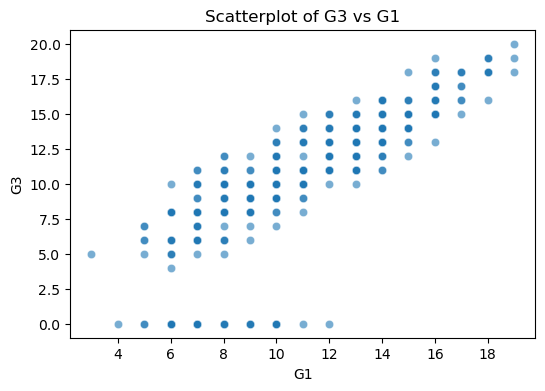

In [214]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=student_mat['G1'], y=student_mat['G3'], alpha=0.6)
plt.title(f"Scatterplot of G3 vs G1")
plt.xlabel("G1")
plt.ylabel("G3")
plt.show()

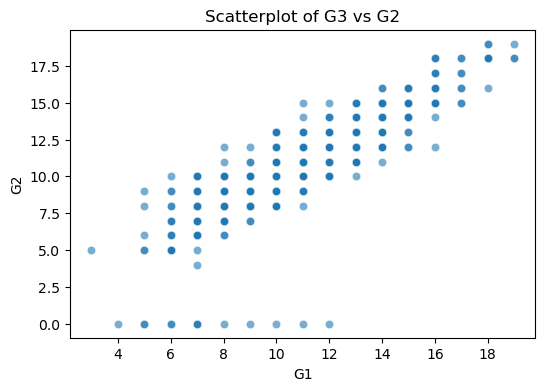

In [215]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=student_mat['G1'], y=student_mat['G2'], alpha=0.6)
plt.title(f"Scatterplot of G3 vs G2")
plt.xlabel("G1")
plt.ylabel("G2")
plt.show()

In [ ]:
# Create boxplots for each numeric variable vs grades
for num_var in categorical_vars:
    for grade in grades:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=student_mat[num_var].astype(str), y=student_mat[grade])
        plt.title(f"Boxplot of {grade} vs {num_var}")
        plt.xlabel(num_var)
        plt.ylabel(grade)
        plt.show()

**Made a function that creates the boxplots**
**

In [ ]:
# Categorical Vars that we want to look at
cat_vars_that_matter_por = [
    "school", "Fjob", "activities", "internet", "higher"
]

def plot_cat_var(df, cat_vars, grade):
    for cat in cat_vars:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat, y=grade, data=student_mat)
        plt.title(f"Boxplot of {grade} by {cat}")
        plt.xlabel(cat)
        plt.ylabel(grade)
        plt.xticks(rotation=45)  # Rotate labels if necessary
        plt.show()

plot_cat_var(student_por, cat_vars_that_matter_por, "G3")

In [ ]:
# Categorical Vars that we want to look at
cat_vars_that_matter_mat = [
    "Mjob", "Fjob", "schoolsup", "higher", "internet"
]

plot_cat_var(student_mat, cat_vars_that_matter_mat, "G3")

In [ ]:
num_vars_that_matter_mat = [
    'G1', 'G2', 'studytime', 'failures', 'absences', 'Medu', 'Fedu'
]

plot_cat_var(student_mat, num_vars_that_matter_mat, "G3")

**Turning grades into categorical letter grades**

In [229]:
# Function to assign letter grades
def assign_grade(score):
    if 16 <= score <= 20:
        return 'A'
    elif 14 <= score <= 15:
        return 'B'
    elif 12 <= score <= 13:
        return 'C'
    elif 10 <= score <= 11:
        return 'D'
    else:
        return 'F'

# Apply function to each grading period
for col, letter_col in zip(["G1", "G2", "G3"], ["L1", "L2", "L3"]):
    student_mat[letter_col] = student_mat[col].apply(assign_grade)
    student_por[letter_col] = student_por[col].apply(assign_grade)

# Display the updated DataFrame
print(student_mat.head())
print(student_por.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  Dalc Walc  health  absences  G1  G2  G3 L1 L2 L3  
0    1    1       3         6   5   6   6  F  F  F  
1    1    1       3         4   5   5   6  F  F  F  
2    2    3       3        10   7   8  10  F  F  D  
3    1    1       5         2  15  14  15  B  B  B  
4    1    2       5         4   6  10  10  F  D  D  

[5 rows x 36 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP  

**Running Chi-Squared Tests for Categorical Vars**

*For student_por data*

In [230]:
# Variables of interest for student_por df
aspects_to_test_por = {
    'Student\'s School and Academic Performance (L3)': ('school', 'L3'),
    'Father\'s Job and Academic Performance (L3)': ('Fjob', 'L3'),
    'Activities and Academic Performance (L3)': ('activities', 'L3'),
    'Internet and Academic Performance (L3)': ('internet', 'L3'),
    'Desire for Higher Education and Academic Performance (L3)': ('higher', 'L3')
}

por_chi_square_results_por = {aspect: perform_chi_square_test(student_por, *columns) for aspect, columns in aspects_to_test_por.items()}
por_chi_square_results_por

{"Student's School and Academic Performance (L3)": (72.65449046165978,
  6.241712970644892e-15,
  True),
 "Father's Job and Academic Performance (L3)": (32.04213901755642,
  0.009874241519057612,
  True),
 'Activities and Academic Performance (L3)': (10.260644624401793,
  0.03625873416731214,
  True),
 'Internet and Academic Performance (L3)': (17.45935165481202,
  0.0015734332738167758,
  True),
 'Desire for Higher Education and Academic Performance (L3)': (88.91338211122759,
  2.240279524964841e-18,
  True)}

*For student_mat data*

In [231]:
# Variables of interest for student_por df
aspects_to_test_mat = {
    'Mothers\'s Job and Academic Performance (L3)': ('Mjob', 'L1'),
    'Father\'s Job and Academic Performance (L3)': ('Fjob', 'L1'),
    'Extra Educational Support and Academic Performance (L3)': ('activities', 'L3'),
    'Desire for Higher Education and Academic Performance (L3)': ('higher', 'L3')
}

por_chi_square_results_mat = {aspect: perform_chi_square_test(student_mat, *columns) for aspect, columns in aspects_to_test_mat.items()}
por_chi_square_results_mat

{"Mothers's Job and Academic Performance (L3)": (36.16528184645535,
  0.0027443778163462936,
  True),
 "Father's Job and Academic Performance (L3)": (30.98729218247349,
  0.013506613621639985,
  True),
 'Extra Educational Support and Academic Performance (L3)': (2.233671422412628,
  0.6928696958165248,
  False),
 'Desire for Higher Education and Academic Performance (L3)': (13.164035807495562,
  0.010501485818484068,
  True)}

**1. First Split the data into training (75%) and testing (25%).**

In [ ]:
# List of statistically significant predictors
sig_cat = ['Mjob', 'Fjob', 'schoolsup', 'higher']
sig_num = ['studytime', 'failures']

# making a subset of the singificant numerical variables
mat_sig_num = student_mat[sig_num]
mat_sig_cat = student_mat[sig_cat]

grades = student_mat['G3']

# set seed using random_state = 4
num_train, num_test, grade_train, grade_test = train_test_split(mat_sig_num, grades, random_state = 4)
cat_train, cat_test, grade_train, grade_test = train_test_split(mat_sig_cat, grades, random_state = 4)

In [ ]:
# 75% Numerical Vars TRAIN SPLIT
print("Num_train:", num_train)

In [ ]:
# 75% Grades TRAIN SPLIT
print("grade_test:", grade_train)

**2. Fit multiple linear regression models with the traning sets for numerical variables**

In [219]:
num_model = LinearRegression()  # Create an instance of LinearRegression
num_model.fit(num_train, grade_train)  # Fit the model with training data

r_sq = num_model.score(num_train, grade_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8083399644685226


In [218]:
model_test = LinearRegression()  # Create an instance of LinearRegression
model_test.fit(num_test, grade_test)  # Fit the model with training data

r_sq = model_test.score(num_test, grade_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8705313668251169


**3. Categorical Variables**

In [222]:
# Define categorical and numerical columns
categorical_cols = ['Mjob', 'Fjob']
binary_cols = ['schoolsup', 'higher']

# One-Hot Encode nominal variables, and encode binary as 0/1
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_cols),  # Avoid dummy variable trap
    ('binary', 'passthrough', binary_cols)  # Keep binary columns as they are for now
])

# Transform categorical variables
data_transformed = preprocessor.fit_transform(student_mat)

# Convert binary columns to 0/1
student_mat[binary_cols] = student_mat[binary_cols].replace({'yes': 1, 'no': 0})

# Convert transformed data back to DataFrame
encoded_df = pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out())

# Combine transformed features with binary variables
x = pd.concat([encoded_df, student_mat[binary_cols]], axis=1)
y = student_mat['G3']

# Spaghetti at the wall method.

In [205]:
# List of important numerical and categorical predictors

# including G1 and G2 because they are highly correlated with G3 grades
# ie. students who have good grades in the first and second trimester are likely to continue to have good grades

# Should we include Medu and Fedu since it's kinda weird?
# Students with Medu and Fedu of 0 perform better (wouldn't you expect the other way around?)

sig_num = ['G1', 'G2', 'studytime', 'failures', 'Medu', 'Fedu']
sig_cat = ['Mjob', 'Fjob', 'schoolsup', 'higher']

# Subset the dataset with these variables
mat_sig_num = student_mat[sig_num]
mat_sig_cat = student_mat[sig_cat]

grades = student_mat['G3']


In [206]:
# Train-test split (set seed for reproducibility)
num_train, num_test, grade_train, grade_test = train_test_split(mat_sig_num, grades, random_state=4)
cat_train, cat_test, grade_train, grade_test = train_test_split(mat_sig_cat, grades, random_state=4)

# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Avoid dummy variable trap
cat_train_encoded = encoder.fit_transform(cat_train)
cat_test_encoded = encoder.transform(cat_test)

# Convert to DataFrame for easy merging
cat_train_df = pd.DataFrame(cat_train_encoded, columns=encoder.get_feature_names_out())
cat_test_df = pd.DataFrame(cat_test_encoded, columns=encoder.get_feature_names_out())

# Merge numerical and encoded categorical data
X_train = pd.concat([num_train.reset_index(drop=True), cat_train_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([num_test.reset_index(drop=True), cat_test_df.reset_index(drop=True)], axis=1)


In [207]:
# Model with only numerical features
model_num = LinearRegression().fit(num_train, grade_train)

# Model with only categorical features (encoded)
model_cat = LinearRegression().fit(cat_train_encoded, grade_train)

# Model with both numerical and categorical features (merged)
model_full = LinearRegression().fit(X_train, grade_train)

# Make predictions for each model on the test set
grade_pred_num = model_num.predict(num_test)
grade_pred_cat = model_cat.predict(cat_test_encoded)
grade_pred_full = model_full.predict(X_test)

# Evaluate each model's performance
r2_num = r2_score(grade_test, grade_pred_num)
r2_cat = r2_score(grade_test, grade_pred_cat)
r2_full = r2_score(grade_test, grade_pred_full)

print(f"Model with Numerical Features R²: {r2_num:.4f}")
print(f"Model with Categorical Features R²: {r2_cat:.4f}")
print(f"Model with Full Features R²: {r2_full:.4f}")


Model with Numerical Features R²: 0.8614
Model with Categorical Features R²: -0.0408
Model with Full Features R²: 0.8562


In [223]:
model_full.coef_

array([ 0.17722238,  0.95842423, -0.18905791, -0.13000294,  0.16080404,
       -0.07085392, -0.03134639,  0.23089361,  0.38666773,  0.13757409,
        0.9999592 ,  0.43995704, -0.10543338,  0.09895688,  0.40230267,
       -0.41069487])

In [224]:
model_full.intercept_

-1.7573653205026218

In [198]:
# Step 1: Make predictions on the test set
grade_pred = model.predict(X_test)

# Step 2: Compute Mean Squared Error (MSE)
mse = mean_squared_error(grade_test, grade_pred)

# Step 3: Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Output the RMSE value
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 1.80


In [193]:
# Train the model
model = LinearRegression()
model.fit(X_train, grade_train)

# Make predictions and evaluate
grade_pred = model.predict(X_test)

# Evaluate model performance
r2 = r2_score(grade_test, grade_pred)
mse = mean_squared_error(grade_test, grade_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.856
Mean Squared Error: 3.23


In [194]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print(feature_importance)


          Feature  Coefficient
10    Fjob_health     0.999959
1              G2     0.958424
11     Fjob_other     0.439957
14  schoolsup_yes     0.402303
8   Mjob_services     0.386668
7      Mjob_other     0.230894
0              G1     0.177222
4            Medu     0.160804
9    Mjob_teacher     0.137574
13   Fjob_teacher     0.098957
6     Mjob_health    -0.031346
5            Fedu    -0.070854
12  Fjob_services    -0.105433
3        failures    -0.130003
2       studytime    -0.189058
15     higher_yes    -0.410695
